<h1 align="center" style="background-color:#616161;color:white">Next play prediction</h1>

<h3 style="background-color:#616161;color:white">0. Setup code (you can ignore this)</h3>

In [1]:
# import modules
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
import datetime
import csv
import json
import time
import random
import sqlite3
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import logging

## Parameters you can change

# Abs path to settings file
root = "C:/DS/Github/MusicRecommendation"  # BA, Windows
#root = "/home/badrul/Documents/github/MusicRecommendation" # BA, Linux

## Import the codebase module
fPath = root + "/1_codemodule"
if fPath not in sys.path: sys.path.append(fPath)

import coreCode as cb
import lastfmCode as fm

## Finish setting up
os.chdir(root)

settingsDict =  cb.loadSettings()

dbPath = root + settingsDict['mainDbPath']
fmSimilarDbPath = root + settingsDict['fmSimilarDbPath']
fmTagsDbPath = root + settingsDict['fmTagsDbPath']
trackMetaDbPath = root + settingsDict['trackmetadata']


C:\DS\Installs\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [11]:
def TimeSeriesPredict_FreqTable(playHistory, freqTable, w):
    # Takes in a timeslot list and a freqency table, and weighting for user obs
    # Returns next dd/mm/yy timestamp and probability
    # The timeslot list must be of the same format as  'timeSlot' field in freqTable
    return 0
    


<h3 style="background-color:#616161;color:white">1. Model Parameters</h3>

In [3]:
# Eval 1: Predicting next play
StartIntervalTime = 10   # Used when selecting random cut-off points in eval 1

# Eval 2: Adapting to new users
newUsers = 10   # Num of randomly selected users to separate out of eval 2

<h3 style="background-color:#616161;color:white">1. Construct a frequency table in the db of when users start listening to music</h3>

In [4]:
con = sqlite3.connect(dbPath)
con.row_factory = sqlite3.Row
cursor = con.cursor()

# Perform sql query to bring back the right results, use pandas to pivot to the right form, then save back into db
sqlStr = "Select UserID,  TimeSlot, count(PlayedTimestamp)  as count  from tblMain where MinsSincePrevPlay > {} group by TimeSlot, UserID".format(StartIntervalTime)
df = pd.read_sql_query(sqlStr, con)
df=df.set_index('UserID')
#df=df.pivot(index='UserID', columns='TimeSlot', values='count')
df.to_sql('tblPlayTimetable',con,if_exists='replace')

con.close()

<h3 style="background-color:#616161;color:white">2. Review frequency table</h3>

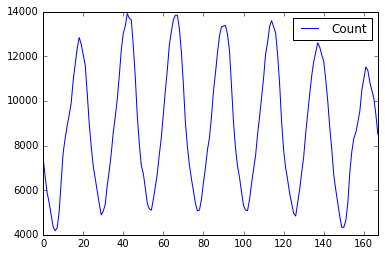

In [5]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(dbPath)
df = pd.read_sql_query("SELECT TimeSlot, sum(Count) as Count from tblPlayTimetable group by Timeslot", con)
con.close()

#total = df['Count','TimeSlot'].groupby(['TimeSlot']).sum()
df.plot()

<h4 style="background-color:#616161;color:white">User Level Frequency</h4>

(0, 80)

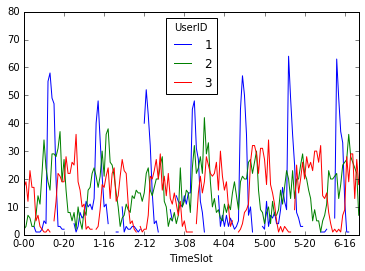

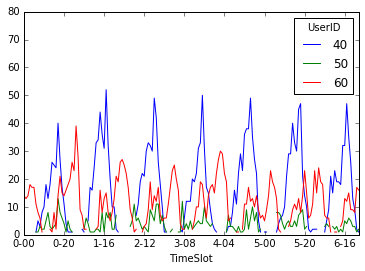

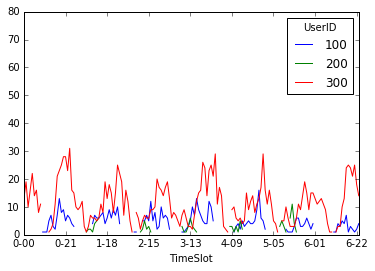

In [6]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(dbPath)
df = pd.read_sql_query("SELECT UserID, TimeSlot, sum(Count) as Count from tblPlayTimetable group by UserID, TimeSlot", con)
con.close()
df.set_index('TimeSlot', inplace=True)  #inplace means modify this df

userList = [1,2,3]
df2 = df.loc[df['UserID'].isin(userList)]
df2 = df2.pivot(columns='UserID', values='Count')
ax1 = df2.plot()
ax1.set_ylim(0,80)

userList = [40,50,60]
df2 = df.loc[df['UserID'].isin(userList)]
df2 = df2.pivot(columns='UserID', values='Count')
ax2 = df2.plot()
ax2.set_ylim(0,80)

userList = [100,200,300]
df2 = df.loc[df['UserID'].isin(userList)]
df2 = df2.pivot(columns='UserID', values='Count')
ax2 = df2.plot()
ax2.set_ylim(0,80)

<h3 style="background-color:#616161;color:white">3. Get training data</h3>

In [9]:
con = sqlite3.connect(dbPath)
trainDF = pd.read_sql_query("SELECT M.UserID, M.PlayedTimestamp, M.TimeSlot, M.MinsSincePrevPlay, M.historyID, tblUsers.TestCutOff from tblMain as M INNER JOIN tblUsers ON M.UserID = tblUsers.UserID WHERE M.historyID < tblUsers.TestCutOff", con)
testDF = pd.read_sql_query("SELECT M.UserID, M.PlayedTimestamp, M.TimeSlot, M.MinsSincePrevPlay, M.historyID, tblUsers.TestCutOff from tblMain as M INNER JOIN tblUsers ON M.UserID = tblUsers.UserID WHERE M.historyID = tblUsers.TestCutOff", con)
users = trainDF['UserID'].unique()
con.close()

<h3 style="background-color:#616161;color:white">4. Prediction Model 1 - Frequency Table Based</h3>

In [12]:
con = sqlite3.connect(dbPath)
freqTbl = pd.read_sql_query("Select * from tblPlayTimetable", con)
con.close()

w = 1  # How much weighting to give user observations over population observation

start_time = time.time()
# Get list of users
for user in users:
    for idx,row in trainDF[trainDF.UserID == user].iterrows():
        df=row['TimeSlot']
        TimeSeriesPredict_FreqTable(df,freqTbls,w)
        
print(time.time() - start_time)


0.0


In [ ]:
# 52.83949925327301 - embedded
56.33567500114441